In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import mysql.connector as sql

##### Build the SQL connection:

In [2]:
db_connection = \
sql.connect(host='wcd-sql-class.c0h2bhc51r9d.us-east-1.rds.amazonaws.com', \
            database='credit', \
            user='student19', password='noisybutter764')

In [3]:
query="""
select
base.*,
base2.status_c_mean,
base2.status_x_mean,
base2.status_0_mean,
base2.status_1_mean,
base2.status_2_mean,
base2.status_3_mean,
base2.status_4_mean,
base2.status_5_mean,
base3.num_of_app,
base3.num_of_ref,
base3.avg_APP_CREDIT_PERC
from
(select a.*, 
AMT_CREDIT/AMT_ANNUITY as NEW_CREDIT_TO_ANNUITY_RATIO,
AMT_CREDIT/AMT_GOODS_PRICE as NEW_CREDIT_TO_GOODS_RATIO,
OWN_CAR_AGE/DAYS_BIRTH as NEW_CAR_TO_BIRTH_RATIO,
OWN_CAR_AGE/DAYS_EMPLOYED as NEW_CAR_TO_EMPLOY_RATIO,
AMT_CREDIT/AMT_INCOME_TOTAL as NEW_CREDIT_TO_INCOME_RATIO, -- one of the most important variable! DTI
AMT_ANNUITY/AMT_INCOME_TOTAL as NEW_ANNUITY_TO_INCOME_RATIO,
b.NEW_AVG_INC_BY_ORG,
c.cl_max_DAYS_CREDIT,
c.cl_min_DAYS_CREDIT,
c.cl_avg_DAYS_CREDIT,
c.ac_max_DAYS_CREDIT,
c.ac_min_DAYS_CREDIT,
c.ac_avg_DAYS_CREDIT,
c.sd_max_DAYS_CREDIT,
c.sd_min_DAYS_CREDIT,
c.sd_avg_DAYS_CREDIT,
c.bd_max_DAYS_CREDIT,
c.bd_min_DAYS_CREDIT,
c.bd_avg_DAYS_CREDIT,
c.cl_max_CREDIT_DAY_OVERDUE,
c.ac_max_CREDIT_DAY_OVERDUE,
c.sd_max_CREDIT_DAY_OVERDUE,
c.bd_max_CREDIT_DAY_OVERDUE,
c.cl_avg_CREDIT_DAY_OVERDUE,
c.ac_avg_CREDIT_DAY_OVERDUE,
c.sd_avg_CREDIT_DAY_OVERDUE,
c.bd_avg_CREDIT_DAY_OVERDUE,
c.bd_flag,
c.bd_num
from
application as a
left join
(select ORGANIZATION_TYPE, avg(AMT_INCOME_TOTAL) as NEW_AVG_INC_BY_ORG
from application group by 1) as b
on a.ORGANIZATION_TYPE=b.ORGANIZATION_TYPE
left join 
(
select SK_ID_CURR,
max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT else null end) as cl_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT else null end) as ac_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT else null end) as sd_avg_DAYS_CREDIT,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT else null end) as bd_max_DAYS_CREDIT,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_min_DAYS_CREDIT,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT else null end) as bd_avg_DAYS_CREDIT,

max(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Closed' then DAYS_CREDIT_ENDDATE else null end) as cl_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Active' then DAYS_CREDIT_ENDDATE else null end) as ac_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Sold' then DAYS_CREDIT_ENDDATE else null end) as sd_avg_DAYS_CREDIT_ENDDATE,
max(case when CREDIT_ACTIVE ='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_max_DAYS_CREDIT_ENDDATE,
min(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_min_DAYS_CREDIT_ENDDATE,
avg(case when CREDIT_ACTIVE='Bad Debt' then DAYS_CREDIT_ENDDATE else null end) as bd_avg_DAYS_CREDIT_ENDDATE,

max(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_max_CREDIT_DAY_OVERDUE,
max(case when CREDIT_ACTIVE ='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_max_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Closed' then CREDIT_DAY_OVERDUE else null end) as cl_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Active' then CREDIT_DAY_OVERDUE else null end) as ac_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Sold' then CREDIT_DAY_OVERDUE else null end) as sd_avg_CREDIT_DAY_OVERDUE,
avg(case when CREDIT_ACTIVE='Bad Debt' then CREDIT_DAY_OVERDUE else null end) as bd_avg_CREDIT_DAY_OVERDUE,
max(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_flag, 
sum(case when  CREDIT_ACTIVE='Bad Debt'  then 1 else 0 end) as bd_num
from bureau
group by 1) as c
on a.SK_ID_CURR=c.SK_ID_CURR) as base
left join
(select a.SK_ID_CURR,
avg(case when status = 'C' then 1 else 0 end) as status_c_mean,
avg(case when status = 'X' then 1 else 0 end) as status_x_mean,
avg(case when status = '0' then 1 else 0 end) as status_0_mean,
avg(case when status = '1' then 1 else 0 end) as status_1_mean,
avg(case when status = '2' then 1 else 0 end) as status_2_mean,
avg(case when status = '3' then 1 else 0 end) as status_3_mean,
avg(case when status = '4' then 1 else 0 end) as status_4_mean,
avg(case when status = '5' then 1 else 0 end) as status_5_mean
from application as a
join bureau as b
on a.SK_ID_CURR=b.SK_ID_CURR
join bureau_balance as c
on b.SK_BUREAU_id=c.sk_id_bureau
group by 1) as base2 
on base.SK_ID_CURR=base2.SK_ID_CURR
left join
(select SK_ID_CURR,
sum(case when NAME_CONTRACT_STATUS in ('Approved','Unused offer') then 1 else 0 end) as num_of_app,
sum(case when NAME_CONTRACT_STATUS in ('Refused') then 1 else 0 end) as num_of_ref,
avg(case when NAME_CONTRACT_STATUS in ('Approved') then AMT_APPLICATION / AMT_CREDIT else null/*why use null?*/ end) as avg_APP_CREDIT_PERC
from previous_application group by 1) base3
on base.SK_ID_CURR=base3.SK_ID_CURR
"""

In [4]:
final = pd.read_sql(query, con=db_connection)

In [5]:
final.shape

(307511, 162)

In [6]:
final.to_csv('final.csv', index=False, sep='|')

In [7]:
final.shape

(307511, 162)

In [8]:
final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,status_x_mean,status_0_mean,status_1_mean,status_2_mean,status_3_mean,status_4_mean,status_5_mean,num_of_app,num_of_ref,avg_APP_CREDIT_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.1364,0.4091,0.2455,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.949329
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.207699
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.061032
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0.969650


In [9]:
final=pd.read_csv('final.csv', sep='|')

In [10]:
final.shape

(307511, 162)

In [11]:
final.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,status_x_mean,status_0_mean,status_1_mean,status_2_mean,status_3_mean,status_4_mean,status_5_mean,num_of_app,num_of_ref,avg_APP_CREDIT_PERC
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.1364,0.4091,0.2455,0.0,0.0,0.0,0.0,1.0,0.0,1.000000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,0.0,0.949329
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.207699
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,1.061032
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,0.0,0.969650


# Check Missing values

Define a Function to calculate missing values and missing rate by column:

In [12]:
def missing_values_table(df):
        #1 Total missing values
        mis_val = df.isnull().sum()
        
        #2 Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        #3 Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        #4 Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        #5 Only keep the columns with missing values
        mis_val_table_only = mis_val_table_ren_columns.loc[mis_val_table_ren_columns['% of Total Values'] > 0]
        
        #6 Return the dataframe with missing information
        return mis_val_table_only

In [13]:
missing_values_table(final)

,Missing Values,% of Total Values
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
...,...,...
status_4_mean,215280,70.007252
status_5_mean,215280,70.007252
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


Apply the function to our dataframe:

In [14]:
missing=missing_values_table(final)
missing

,Missing Values,% of Total Values
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OWN_CAR_AGE,202929,65.990810
OCCUPATION_TYPE,96391,31.345545
...,...,...
status_4_mean,215280,70.007252
status_5_mean,215280,70.007252
num_of_app,16454,5.350703
num_of_ref,16454,5.350703


Usually there are three options to deal with missing values:
 1. Imputation
 2. Create missing flag
 3. Drop columns with a high percentage of missing vlaues

We see there are a number of columns with a high percentage of missing values. 
There is no well-established threshold for removing missing values, 

and the best course of action depends on the problem. 

Here, to reduce the number of features, we will remove any columns that have greater than 50% missing rate (in real situations, the threshold can be 98%).


In [15]:
## find columns with missing > 50%
missing_columns = list(missing.index[missing['% of Total Values'] > 50])
missing_columns

['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'NEW_CAR_TO_BIRTH_RATIO',
 'NEW_CAR_TO_EMPLOY_RATIO',
 'sd_max_DAYS_CREDIT',
 'sd_min_DAYS_CREDIT',
 'sd_avg_DAYS_CREDIT',
 'bd_max_DAYS_CREDIT',

In [16]:
# drop these columns
final = final.drop(columns = missing_columns)

In [17]:
final.shape

(307511, 101)

In [18]:
# reapply this missing function
re_missing=missing_values_table(final)

In [19]:
re_missing

,Missing Values,% of Total Values
AMT_ANNUITY,12,0.003902
AMT_GOODS_PRICE,278,0.090403
NAME_TYPE_SUITE,1292,0.420148
OCCUPATION_TYPE,96391,31.345545
CNT_FAM_MEMBERS,2,0.000650
EXT_SOURCE_2,660,0.214626
EXT_SOURCE_3,60965,19.825307
YEARS_BEGINEXPLUATATION_AVG,150007,48.781019
FLOORSMAX_AVG,153020,49.760822
YEARS_BEGINEXPLUATATION_MODE,150007,48.781019


In [20]:
final[list(re_missing.index)].dtypes

AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
OCCUPATION_TYPE                  object
CNT_FAM_MEMBERS                 float64
EXT_SOURCE_2                    float64
EXT_SOURCE_3                    float64
YEARS_BEGINEXPLUATATION_AVG     float64
FLOORSMAX_AVG                   float64
YEARS_BEGINEXPLUATATION_MODE    float64
FLOORSMAX_MODE                  float64
YEARS_BEGINEXPLUATATION_MEDI    float64
FLOORSMAX_MEDI                  float64
TOTALAREA_MODE                  float64
EMERGENCYSTATE_MODE              object
OBS_30_CNT_SOCIAL_CIRCLE        float64
DEF_30_CNT_SOCIAL_CIRCLE        float64
OBS_60_CNT_SOCIAL_CIRCLE        float64
DEF_60_CNT_SOCIAL_CIRCLE        float64
DAYS_LAST_PHONE_CHANGE          float64
AMT_REQ_CREDIT_BUREAU_HOUR      float64
AMT_REQ_CREDIT_BUREAU_DAY       float64
AMT_REQ_CREDIT_BUREAU_WEEK      float64
AMT_REQ_CREDIT_BUREAU_MON       float64
AMT_REQ_CREDIT_BUREAU_QRT       float64


Imputation of missing values by using scikit-learn

Fisrt deal with numerical missing value since imputing missing values are different for categorical and numerical variables

In [21]:
## conda upgrade scikit-learn
#from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.impute import SimpleImputer
Imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

Let's take one column as an example:

Create a imputer first by using 'mean' value to impute:

In [22]:
imp = Imputer
type(imp)


sklearn.impute._base.SimpleImputer

In [23]:
final['AMT_ANNUITY'].mean()

27108.573909183444

Fit first:

In [24]:
imp.fit(final[['AMT_ANNUITY']])

SimpleImputer()

In [25]:
final.loc[final['AMT_ANNUITY'].isnull()]['AMT_ANNUITY']

47531    NaN
50035    NaN
51594    NaN
55025    NaN
59934    NaN
75873    NaN
89343    NaN
123872   NaN
207186   NaN
227939   NaN
239329   NaN
241835   NaN
Name: AMT_ANNUITY, dtype: float64

In [26]:
final.loc[47531,'AMT_ANNUITY']

nan

Then transform:

In [27]:
final['AMT_ANNUITY']=imp.transform(final[['AMT_ANNUITY']])

In [28]:
final['AMT_ANNUITY'].isnull().sum()

0

In [29]:
final.loc[47531,'AMT_ANNUITY']

27108.573909183444

Practice: do the mean inputation for **AMT_GOODS_PRICE** and check the result

In [30]:
imp = Imputer
imp.fit(final[['AMT_GOODS_PRICE']])
final['AMT_GOODS_PRICE']=imp.transform(final[['AMT_GOODS_PRICE']])
final['AMT_GOODS_PRICE'].isnull().sum()

0

Now let's us do it for all numerical variables:

In [31]:
re_missing=missing_values_table(final)

In [32]:
num_columns=[col for col in list(re_missing.index) if final[col].dtypes=='float64']
len(num_columns)

38

Use loop to do the imputation for each float variable:

In [33]:
for col in list(re_missing.index):
    if final[col].dtypes=='float64':
        imp = Imputer
        imp.fit(final[[col]])
        final[col]=imp.transform(final[[col]])   

Check the final result:

In [34]:
re_missing=missing_values_table(final)
re_missing

,Missing Values,% of Total Values
NAME_TYPE_SUITE,1292,0.420148
OCCUPATION_TYPE,96391,31.345545
EMERGENCYSTATE_MODE,145755,47.398304


use value_counts() to check each remaining categorical variables:

In [35]:
final['NAME_TYPE_SUITE'].value_counts(dropna=False)

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
NaN                  1292
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [36]:
final['OCCUPATION_TYPE'].value_counts(dropna=False)

NaN                96391
Laborers           55186
Sales staff        32102
Core staff         27570
Managers           21371
Drivers            18603
High skill tech    11380
Accountants         9813
Medicine staff      8537
Security staff      6721
Cooking staff       5946
Cleaning staff      4653
Private service     2652
Low-skill Labor     2093
Waiters/barmen      1348
Secretaries         1305
Realty agents        751
HR staff             563
IT staff             526
Name: OCCUPATION_TYPE, dtype: int64

In [37]:
final['EMERGENCYSTATE_MODE'].value_counts(dropna=False)

No     159428
NaN    145755
Yes      2328
Name: EMERGENCYSTATE_MODE, dtype: int64

# Deal with categorical variables

Most machine learning models unfortunately cannot deal with categorical variables

There are two mains to deal with categorical variables:

1. **Label encoding**: assign each unique category 
   in a categorical variable with an integer. 
   
   No new columns are created. An example is shown below

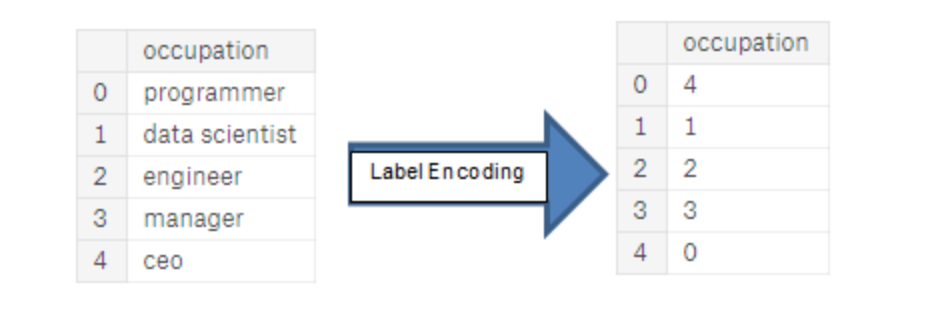

2. **One-hot encoding**: create a new column for each unique category in a categorical variable. 

    Each observation recieves a 1 in the column for its corresponding category and a 0 in all other new columns.

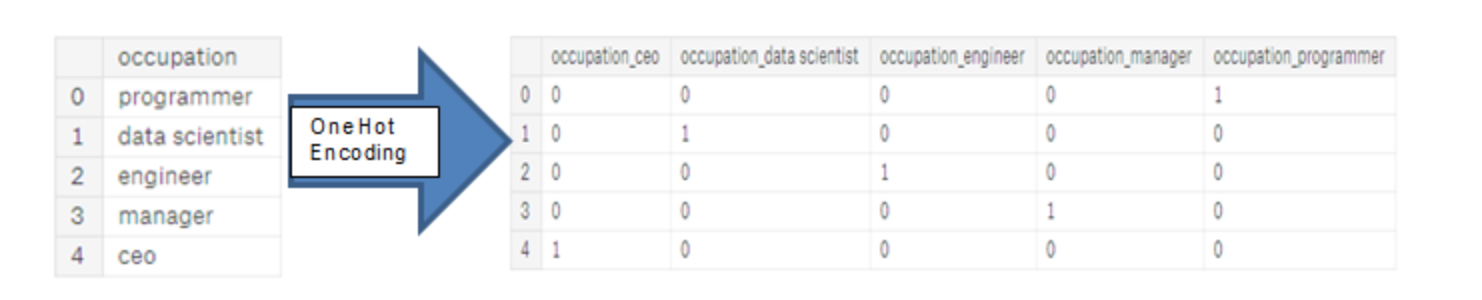

Let's first find all Cateorical columns:

In [38]:
categorical_columns = [col for col in final.columns if final[col].dtype == 'object']
categorical_columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE',
 'EMERGENCYSTATE_MODE']

Let's drop OCCUPATION_TYPE column which is not very informative:

In [39]:
#drop(): Remove rows or columns by specifying label names and corresponding axis, or by specifying directly index or column names
final=final.drop(columns=['OCCUPATION_TYPE'])

drop other useless columns:
- NAME_EDUCATION_TYPE
- NAME_TYPE_SUITE
- WEEKDAY_APPR_PROCESS_START
- ORGANIZATION_TYPE

In [40]:
final=final.drop(columns=['NAME_EDUCATION_TYPE','NAME_TYPE_SUITE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'])

One-hot encoding:

In [41]:
def cate_convert(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [42]:
final,cat_cols = cate_convert(final, nan_as_category = True)

In [43]:
missing_values_table(final)

,Missing Values,% of Total Values


In [44]:
final.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,NAME_HOUSING_TYPE_nan,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes,EMERGENCYSTATE_MODE_nan
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,0,1,0,0,0,0,0,1,0,0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,0,1,0,0,0,0,0,1,0,0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,0,1,0,0,0,0,0,0,0,1
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,1,0,0,0,0,0,0,0,1
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,0,1,0,0,0,0,0,0,0,1


# Correlations

Find correlations with the target and sort:

In [45]:
correlations = final.corr()['TARGET'].sort_values()

In [46]:
# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 DAYS_LAST_PHONE_CHANGE         0.055218
NAME_INCOME_TYPE_Working       0.057481
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
num_of_ref                     0.063142
NEW_CREDIT_TO_GOODS_RATIO      0.069397
DAYS_BIRTH                     0.078239
TARGET                         1.000000
NAME_CONTRACT_TYPE_nan              NaN
CODE_GENDER_nan                     NaN
FLAG_OWN_CAR_nan                    NaN
FLAG_OWN_REALTY_nan                 NaN
NAME_INCOME_TYPE_nan                NaN
NAME_FAMILY_STATUS_nan              NaN
NAME_HOUSING_TYPE_nan               NaN
Name: TARGET, dtype: float64

Most Negative Correlations:
 EXT_SOURCE_2                         -0.160303
EXT_SOURCE_3                         -0.157397
CODE_GENDER_F                        -0.054704
NAME_INCOME_TYPE_Pensioner           -0.046209
DAYS_EMPLOYED                        -0.044932
EMERGENCYSTATE_MODE_No               -0.042201
AMT_GOODS_PRICE               

Create a backup file before model build:

In [47]:
final.to_csv('final_model.csv', index=False, sep='|')

In [48]:
final.shape

(307511, 127)

# Train/Test Split

Define the target variable (dependent variable) as y:

In [49]:
y=final['TARGET']

In [50]:
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [51]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(final, y, test_size=0.25)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(230633, 127)
(230633,)
(76878, 127)
(76878,)


Drop the target variables from X_train and X_test:

In [52]:
X_test = X_test.drop(columns = ['TARGET'])

In [53]:
X_train = X_train.drop(columns = ['TARGET'])

# Logistic Regression Implementation

Get all the features:

In [54]:
features = list(X_train.columns)
features

['SK_ID_CURR',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'YEARS_BEGINEXPLUATATION_AVG',
 'FLOORSMAX_AVG',
 'YEARS_BEGINEXPLUATATION_MODE',
 'FLOORSMAX_MODE',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'FLOORSMAX_MEDI',
 'TOTALAREA_MODE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMEN

We will use LogisticRegression from Scikit-Learn for our first model:

In [55]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(solver = 'liblinear')

1. Train on the training data:

In [56]:
log_reg.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

2. Make the prediction:

Now that the model has been trained, we can use it to make predictions. 

We want to predict the probabilities of not paying a loan, so we use the model **predict_proba** method.

The first column is the probability of the target being 0 and the second column is the probability of the target being 1

In [57]:
log_reg_pred = log_reg.predict_proba(X_test)
log_reg_pred

array([[0.85001601, 0.14998399],
       [0.87335639, 0.12664361],
       [0.94571096, 0.05428904],
       ...,
       [0.93573512, 0.06426488],
       [0.93979888, 0.06020112],
       [0.99248768, 0.00751232]])

In [58]:
y_pred_proba=log_reg_pred[:,1]
y_pred_proba

array([0.14998399, 0.12664361, 0.05428904, ..., 0.06426488, 0.06020112,
       0.00751232])

3. Predict the label:

**.predict()** is for predicting class labels:

Sci-Kit learn is using a threshold of P>0.5 for binary classifications

In [59]:
y_pred = log_reg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Check key model metrics

An ROC curve is a plot of True Positive Rate vs False Positive Rate where False Positive Rate=FP/(TN+FP) =1-Specificity.

4. Show the ROC_CURVE to evaluate the model performance:

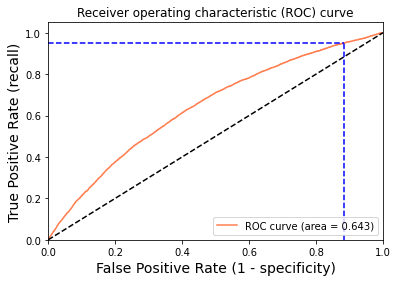

In [60]:
# Show the ROC_CURVE
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
y_pred_proba=log_reg_pred[:,1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

**AUROC** (Area Under the Receiver Operating Characteristics) The more the area enclosed by the ROC curve, the better it is. The area under the curve can lie between 0 and 1. The closer it is to 1, the better it is

# Implement Random Forest

**Ensemble learning**, in general, is a model that makes predictions based on a number of different models. By combining individual models, the ensemble model tends to be more flexible (less bias) and less data-sensitive (less variance)
Two most popular ensemble methods are bagging and boosting.

**Bagging**: Training a bunch of individual models in a parallel way. Each model is trained by a random subset of the data => bootstrapping the data plus using the aggregate to make a decision is called bagging!

- **Random forest** is an ensemble model using bagging as the ensemble method and decision tree as the individual model.

**Boosting**: Training a bunch of individual models in a sequential way. Each individual model learns from mistakes made by the previous model

- **Gradient Boosting**: GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree. GBT build trees one at a time, where each new tree helps to correct errors made by previously trained tree.

Create a random forest classifier:

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=5
)

1. Train the model:

In [63]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=200)

2. Make the prediction:

In [64]:
rf_model_pred = rf_model.predict_proba(X_test)
y_pred_proba=rf_model_pred[:,1]
y_pred_proba

array([0.07715649, 0.17398386, 0.04938845, ..., 0.14612482, 0.0475879 ,
       0.04689021])

3. Predict the label:

In [65]:
y_pred = rf_model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

4. Show the ROC_CURVE to evaluate the model performance:

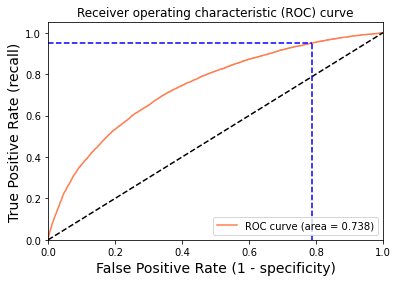

In [66]:
import numpy as np
y_pred_proba=rf_model_pred[:,1]
[fpr, tpr, thr] = metrics.roc_curve(y_test, y_pred_proba)
idx = np.min(np.where(tpr > 0.95))  # index of the first threshold for which the sensibility > 0.95
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % metrics.auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([0, fpr[idx]], [tpr[idx], tpr[idx]], 'k--', color='blue')
plt.plot([fpr[idx], fpr[idx]], [0, tpr[idx]], 'k--', color='blue')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()

As you can see the advanced Machine Learning can have a much better performance than the traddional model